In [7]:
filename='./L1641C_files/L1641C_HNC_30m_5sig.txt'
file = open(filename,'r')

filename3='./ALMAfiles/L1641C_N2H+_ALMA_4sig.txt'
file = open(filename,'r')

filename2='APOGEE_YSOs_full'
file = open(filename2,'r')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

data=np.genfromtxt(filename,dtype=None,names=True)
data2=np.genfromtxt(filename2,dtype=None,delimiter=',',names=True)
data3=np.genfromtxt(filename3,dtype=None,names=True)

vel=data['VEL']
RA=data['RA']
DEC=data['DEC']

vel_A=data3['VEL']
RA_A=data3['RA']
DEC_A=data3['DEC']

RA_AP=data2['RA']
DEC_AP=data2['DEC']
velAp=data2['VLSR']
x_V380=data2['x_V380']
y_V380=data2['y_V380']
x_L1641N=data2['x_L1641N']
y_L1641N=data2['y_L1641N']
x_L1641C=data2['x_L1641C']
y_L1641C=data2['y_L1641C']
x_L1641S=data2['x_L1641S']
y_L1641S=data2['y_L1641S']
x_OMC4S=data2['x_OMC4S']
y_OMC4S=data2['y_OMC4S']


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


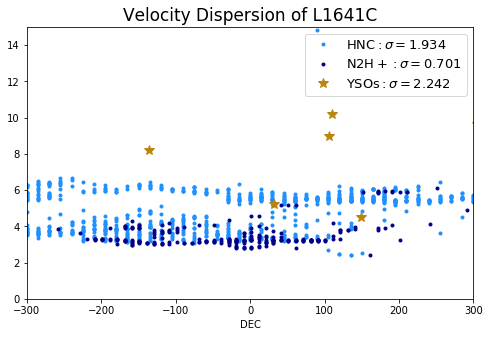

In [9]:

vel_YSOs_clump=[]
x_YSOs_clump=[]
for i in range(len(velAp)):
    if x_L1641S[i] < 400. and x_L1641S[i] > -700. and y_L1641S[i] < 400. and y_L1641S[i] > -700. and velAp[i] < 20:
        vel_YSOs_clump.append(velAp[i])
        x_YSOs_clump.append(x_L1641S[i])
        
sig_YSOs=stat.pstdev(vel_YSOs_clump)
sig_N2Hp=stat.pstdev(vel_A)

HNC=[]
for j in range(len(DEC)):
    if DEC[j]>-200:
        HNC.append(vel[j])
        
  

sig_HNC=stat.pstdev(HNC)


plt.figure(1,(8,5))
plt.title('Velocity Dispersion of L1641C',fontsize=17)
plt.plot(DEC,vel,'.',color='dodgerblue',label=r'$\mathrm{HNC:} \sigma=%.3f$'%(sig_HNC))
plt.plot(DEC_A,vel_A,'.',color='darkblue',label=r'$\mathrm{N2H+: } \sigma=%.3f$'%(sig_N2Hp))
plt.autoscale(enable=False)
plt.plot(x_YSOs_clump,vel_YSOs_clump,'*',color='darkgoldenrod',markersize='10',label=r'$\mathrm{YSOs: } \sigma=%.3f$'%(sig_YSOs) )
plt.ylim(0,15)
plt.xlabel('DEC')
plt.legend(fontsize=13)
plt.xlim(-300,300)
plt.show()

In [ ]:
plt.figure(2,(8,5))
plt.title('Distribution of Velocities in V380')
plt.hist(vel,bins=50,range=(2,15),label='Dense Clouds')
plt.hist(YSOs_clump,bins=50,range=(2,15),label='Apogee YSOs')
plt.legend()
plt.yscale('log')
plt.show()